In [4]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt


Load cycle life data

In [53]:
raw_data_path = "dataset/169 LFP"
precision = "float32"

In [54]:
cycle_lives_train = np.genfromtxt(raw_data_path + '/cycle_lives/train_cycle_lives.csv',
                                          delimiter=',', dtype=precision)
cycle_lives_test1 = np.genfromtxt(raw_data_path + '/cycle_lives/test1_cycle_lives.csv',
                                  delimiter=',', dtype=precision)
cycle_lives_test2 = np.genfromtxt(raw_data_path + '/cycle_lives/test2_cycle_lives.csv',
                                  delimiter=',', dtype=precision)
cycle_lives_test3 = np.genfromtxt(raw_data_path + '/cycle_lives/test3_cycle_lives.csv',
                                  delimiter=',', dtype=precision)

load empirical mdoel params

In [62]:
params = []

In [64]:
model_names = [
            # "E2E-Elastic-discharge",
            # "E2E-Elastic-deltaQ",
            # "Sequential-Elastic-discharge",
            # "Sequential-Elastic-deltaQ",
            # "Sequential-ENN-discharge",
            # "Sequential-ENN-deltaQ",
            "E2E-ENN-discharge",
            "E2E-ENN-deltaQ",
]
dataset_idxs = [0]
for model_name in model_names:
    file_path = "End to End Framework/All empirical params/169 LFP/" + model_name + '/dataset_'
    for idx in dataset_idxs:
        param = np.genfromtxt(file_path + str(idx) + '.csv', delimiter=',', dtype="float32")
        param[:, 0] = param[:, 0]
        params.append(param)

In [65]:
e2e_idx = [0, 1, 6, 7]
seq_idx = [2, 3, 4, 5]
all_idx = [e2e_idx, seq_idx]

In [66]:
len(params)

8

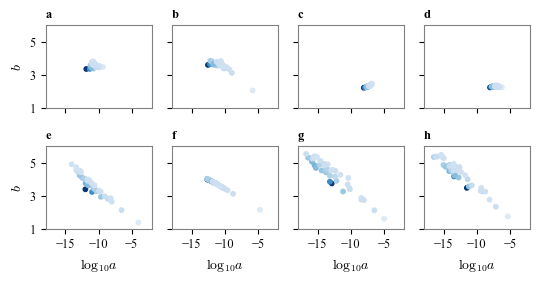

In [119]:
maxCycleAll = max([np.max(cycle_lives_train), np.max(cycle_lives_test1), np.max(cycle_lives_test2), np.max(cycle_lives_test3)])
minCycleAll = min([np.min(cycle_lives_train), np.min(cycle_lives_test1), np.min(cycle_lives_test2), np.min(cycle_lives_test3)])
cmap = cm.get_cmap('Blues')
sz = 10
fontSize = 9
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["legend.loc"] = 'lower left'
fontdict = {'fontsize': fontSize,
 'horizontalalignment': 'left'}
fig, axs = plt.subplots(nrows=2, ncols=4, sharex='all', sharey='all', figsize=(5.5, 3))
k = 0
for type in range(2):
    for model in range(4):
        log10a, b = np.log10(params[all_idx[type][model]][:, 0]), params[all_idx[type][model]][:, 1]
        axs[type][model].scatter(log10a, b, s=sz, c=cycle_lives_train, cmap=cmap, vmin=0, vmax=maxCycleAll)
        axs[type][model].set_xticks(np.linspace(-15,-5,3), minor=False, fontSize=fontSize)
        axs[type][model].set_xlim(-18, -2)
        axs[type][model].set_ylim(1, 6)
        axs[type][model].set_yticks(np.linspace(1,5,3), minor=False, fontSize=fontSize)
        axs[type][model].tick_params(axis='both', labelsize=fontSize)
        axs[type][model].set_title(chr(97 + k), loc='left', weight='bold', fontdict=fontdict)
        axs[type][model].spines["top"].set_color("gray")
        axs[type][model].spines["right"].set_color("gray")
        axs[type][model].spines["bottom"].set_color("gray")
        axs[type][model].spines["left"].set_color("gray")
        k += 1

    # axs[0].scatter(empirical_params_joint['b_bar_test1'], empirical_params_joint['log10_a_bar_test1'], s=sz, c=dataCycleLivesTest1, cmap=cmap, vmin=-2000, vmax=maxCycleAll)
    # axs[0].scatter(empirical_params_joint['b_bar_test2'], empirical_params_joint['log10_a_bar_test2'], s=sz, c=dataCycleLivesTest2, cmap=cmap, vmin=0, vmax=maxCycleAll)
    # axs[1].scatter(empirical_params_disjoint['b_test1_es'], empirical_params_disjoint['log10a_test1_es'], s=sz, c=dataCycleLivesTest1, cmap=cmap, vmin=0, vmax=maxCycleAll)
    # sc1 = axs[1].scatter(empirical_params_disjoint['b_test2_es'], empirical_params_disjoint['log10a_test2_es'], s=sz, c=dataCycleLivesTest2, cmap=cmap, vmin=0, vmax=maxCycleAll)

# set labels
axs[1][0].set_xlabel('$\mathrm{log}_{10}a$', fontsize=fontSize+1)
axs[1][1].set_xlabel('$\mathrm{log}_{10}a$', fontsize=fontSize+1)
axs[1][2].set_xlabel('$\mathrm{log}_{10}a$', fontsize=fontSize+1)
axs[1][3].set_xlabel('$\mathrm{log}_{10}a$', fontsize=fontSize+1)
axs[0][0].set_ylabel('$b$', fontsize=fontSize+1)
axs[1][0].set_ylabel('$b$', fontsize=fontSize+1)

# axs[1].set_xlabel('$b$', fontsize=fontSize)
#
# # # Set limits for x and y axes
# axs[0].set_xlim([1, 5])
# axs[1].set_xlim([1, 5])
# axs[0].set_ylim([-15, -3])
# axs[1].set_ylim([-15, -3])
#
# # # set ticks
# axs[0].set_xticks(np.linspace(1,5,3), minor=False)
# axs[1].set_xticks(np.linspace(1,5,3), minor=False)
# axs[0].tick_params(axis='both', labelsize=9)
# axs[1].tick_params(axis='both', labelsize=9)
#
# cbar = fig.colorbar(sc1, ax=axs[1])
# cbar.ax.set_xticks(np.linspace(0,2000,3), minor=False)
# cbar.ax.tick_params(labelsize=9)
# cbar.set_label('Cycle life', fontsize=9)  # cax == cb.ax
fig.tight_layout(rect=[0, 0.01, 1, 0.99])
plt.show()

In [120]:
fig.savefig("empirical_params.svg", transparent=True, format='svg', dpi=1000)

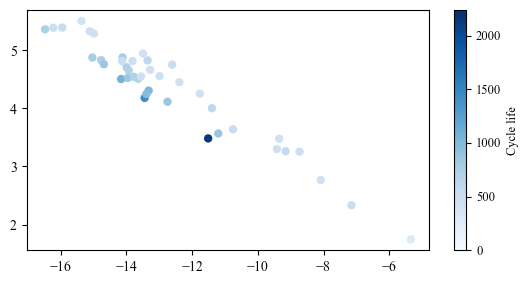

In [121]:
maxCycleAll = max([np.max(cycle_lives_train), np.max(cycle_lives_test1), np.max(cycle_lives_test2), np.max(cycle_lives_test3)])
cmap = cm.get_cmap('Blues')
sz = 25
fontSize = 9
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["legend.loc"] = 'lower left'
fontdict = {'fontsize': fontSize,
 'horizontalalignment': 'left'}
fig, ax = plt.subplots(figsize=(5.5, 3))
sc = ax.scatter(log10a, b, s=sz, c=cycle_lives_train, cmap=cmap, vmin=0, vmax=maxCycleAll)
cbar = fig.colorbar(sc, ax=ax, ticks=[0, 500, 1000, 1500, 2000])
cbar.ax.set_xticks(np.linspace(0,2000,3), minor=False)
cbar.ax.tick_params(labelsize=9)
cbar.set_label('Cycle life', fontsize=fontSize)  # cax == cb.ax
fig.tight_layout(rect=[0, 0.01, 1, 0.99])
sc.set_clim(0, maxCycleAll+1)
plt.show()

In [122]:
fig.savefig("empirical_params_1.svg", transparent=True, format='svg', dpi=1000)